<div align="center">
    
# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-215: Εφαρμοσμένα Μαθηματικά για Μηχανικούς
## Εαρινό Εξάμηνο 2022-2023
### Διδάσκοντες: Γ. Στυλιανού, Γ. Καφεντζής
    
## Ανάθεση: 24-2-2023
## Παράδοση (ηλεκτρονικά, όπως αναφέρεται στην ιστοσελίδα του μαθήματος): 
## Σάββατο, 11-3-2023, 23:59:59
<h1><center>Άσκηση 2</center></h1>

Σε κάθε άσκηση Python, εισάγουμε πρώτα τις βιβλιοθήκες που θα χρησιμοποιήσουμε: εδώ, θα χρειαστούμε τις `numpy`, `matplotlib`, και `scipy`. Επιλέξτε το παρακάτω κελί κώδικα και πατήστε Shift + Enter, ώστε να το εκτελέσετε. Το ίδιο θα κάνετε με οποιοδήποτε κελί κώδικα. Αν τροποποιήσετε κάποιο κελί κώδικα, θα πρέπει να το ξανατρέξετε για να δείτε τα αποτελέσματά του.

In [2]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

Μόνο και μόνο με τις έννοιες της *ενέργειας* και των απλών πρότυπων σημάτων, όπως ο *τετραγωνικός παλμός*, που έχετε μάθει, μπορείτε να δείτε μερικές εφαρμογές όπως η **ανίχνευση δραστηριότητας ομιλίας** - **voice activity detection**. Αλγόριθμοι που υλοποιούν τέτοιες εφαρμογές υπάρχουν σε κάθε κινητό τηλέφωνο. 

Μια ιδιαίτερα απλοϊκή υλοποίηση ενός τέτοιου είναι η εξής :
- Διαβάζετε ένα αρχείο ομιλίας στην Python που σας δίνεται.
- Παραθυροποιείτε με χρήση τετραγωνικού παλμού το σήμα σας, "κόβοντας" έτσι ένα τμήμα του.
- Για κάθε παραθυροποιημένο σήμα, υπολογίζετε την ενέργεια του από τη γνωστή σχέση.
- Ανάλογα με την τιμή της ενέργειας, αποφασίζετε αν το παραθυροποιημένο σήμα περιέχει ομιλία ή όχι.
- Προχωράτε στο επόμενο παραθυροποιημένο σήμα και επαναλαμβάνετε, ως το τέλος του σήματος.

Ερωτήματα που προκύπτουν από την ανάγνωση του παραπάνω αλγορίθμου:

(α') Πόση είναι η διάρκεια του τετραγωνικού παλμού; Μια τιμή κοντά στα $30$ ms είναι καλή. Δεν υπάρχει βέλτιστη διάρκεια, υπάρχουν trade-offs είτε έχει μεγάλη είτε μικρή διάρκεια.

(β') Πόση απόσταση ϑα έχουν τα διαδοχικά παραθυροποιημένα σήματα μεταξύ τους; Στην πράξη, θα πρέπει όχι απλά να είναι διαδοχικά, αλλά να έχουν και κάποιο ποσοστό επικάλυψης. Για τους δικούς μας σκοπούς, θα χρησιμοποιήσουμε $0\%$ επικάλυψη, δηλ. τα παραθυροποιημένα σήματα θα είναι ακριβώς διαδοχικά, χωρίς "κενά" μεταξύ τους (αφού κάτι τέτοιο θα σήμαινε απώλεια εκτίμησης δραστηριότητας ομιλίας).

(γ') Πώς αποφασίζω με ϐάση την ενέργεια αν το εκάστοτε παραθυροποιημένο σήμα είναι τμήμα ομιλίας; Αυτή είναι μια ερώτηση που δέχεται αρκετές απαντήσεις - προσεγγίσεις. Ξανά μια απλή προσέγγιση είναι ότι στην αρχή του σήματος, υπάρχουν μερικά δευτερόλεπτα σιωπής - μπορείτε να εκτιμήσετε την ενέργεια σε αυτά τα παραθυροποιημένα σήματα και να αποφασίζετε ϐάσει αυτής (με κάποιο στατιστικό) για τα επόμενα τμήματα ομιλίας.

Θα χρησιμοποιήσουμε το ολοκλήρωμα Riemann για να υπολογίσουμε την ενέργεια. Το σήμα ομιλίας που έχουμε ηχογραφήσει και σας δίνουμε είναι *ψηφιακό* και όταν το διαβάζετε στην `Python`, το μετατρέπετε σε *διακριτού χρόνου*. 

Μέχρι τότε όμως, ας καταλάβουμε λίγο τι συμβαίνει. Έστω ότι το σήμα ομιλίας είναι το σήμα

In [3]:
x = [1, 0.5, 1.2, -1.7, 2.4, -0.3, -1.1, 0.6, -0.9]

Οι τιμές που βλέπετε αποτελούν δείγματα του σήματος ομιλίας συνεχούς χρόνου που καταγράφηκε. Τα δείγματα αυτά λήφθηκαν ανά $1/F_s$ δευτερόλεπτα πραγματικού χρόνου, με $F_s$ να είναι η συχνότητα δειγματοληψίας, που σας δίνεται έτοιμη κάθε φορά που ανοίγετε ένα αρχείο ήχου στην Python. Αν, για παράδειγμα, η συχνότητα δειγματοληψίας είναι $16000$ Hz, τότε το παραπάνω σήμα $9$ δειγμάτων προέρχεται από ένα σήμα συνεχούς χρόνου διάρκειας $9/16000 = 562.5$ μs $= 0.5625$ ms $= 0.0005625$ s - πολύ μικρό. Για να φτάσουμε στα $30$ ms που αναφέρει παραπάνω η άσκηση, χρειαζόμαστε $480$ δείγματα - αφού $480/16000 = 0.03$ s $= 30$ ms. Ας συνεχίσουμε όμως σε αυτό το toy example και ας υποθέσουμε όμως ότι θέλουμε να υπολογίσουμε την ενέργεια ανά $187.5$ μs, δηλ. ανά μόλις $3$ δείγματα. Τότε θα χωρίσουμε το σήμα σε τριάδες, που ουσιαστικά αυτό αντιστοιχεί σε διαδοχικούς πολλαπλασιασμούς με μη επικαλυπτόμενους τετραγωνικούς παλμούς μοναδιαίου πλάτους και διάρκειας $187.5$ μs: προκύπτουν τρεις τριάδες, $(1, 0.5, 1.2), (−1.7, 2.4,−0.3), (−1.1, 0.6,−0.9)$, και θα υπολογίσουμε την ενέργειά τους όπως στην Άσκηση 2 των θεωρητικών ασκήσεών σας, δηλ:

In [5]:
Fs = 8000 # Έστω μια συχνότητα δειγματοληψίας
Dt = 1/Fs
E1 = Dt * sum(np.square([1, 0.5, 1.2]))
E2 = Dt * sum(np.square([-1.7, 2.4, -0.3]))
E3 = Dt * sum(np.square([-1.1, 0.6, -0.9]))

print(f"E1 = {E1}\nE2 = {E2}\nE3 = {E3}\n") 
# θα πρέπει να λάβετε: E1 = 0.00033625, E2 = 0.001092499999999999, E3 = 0.0002975

E1 = 0.00033625
E2 = 0.0010924999999999997
E3 = 0.0002975



Σας γνωστοποιούμε ότι τα πρώτα 2 δευτερόλεπτα του σήματος περιέχουν σιωπή. Ακολουθώντας τον παρακάτω σκελετό, υλοποιήστε έναν απλό ενεργειακό ανιχνευτή δραστηριότητας ομιλίας. Συμπληρώστε κατάλληλα παρακάτω:

In [ ]:
# Φόρτωση αρχείου ήχου στην Python (Fs είναι η συχνότητα δειγματοληψίας)
Fs, s = wav.read('speech.wav')

# Βήμα στο χρόνο
Dt = 1/Fs

# Κανονικοποίηση του σήματος σε πλάτη [-1,1]
s = s/max(abs(s))

# 30 ms στο χρόνο, σε πόσα δείγματα αντιστοιχούν?
T = # INSERT CODE HERE

# Συνολική διάρκεια σήματος
L = len(s)

# Πόσοι παλμοι, μη επικαλυπτόμενοι, χωρούν σε όλο το σήμα?
N = round(L/T)

# Δέσμευση μνήμης
Energy = np.zeros(N)
Time = np.zeros(N)

for i in range(N):
    
    # Χρησιμοποιώντας τα i και T, κόψτε ένα κομμάτι του σήματος s διάρκειας T
    windowed_speech = # INSERT CODE HERE

    # Υπολογίστε την ενέργεια του τμήματος σ΄ήματος (όπως δείξαμε παραπάνω)
    Energy[i] = # INSERT CODE HERE
    
    # Κέντρο του κάθε κομματιού
    Time[i] = round(i*T+T/2)

Ας επιλέξουμε κατώφλι απόφασης με βάση τα frames της σιωπής στην αρχή του αρχειου. Συμπληρώστε κατάλληλα παρακάτω.

In [ ]:
# Κατώφλι απόφασης
No_Silence_Frames = round(2*Fs/T)             # το πληθος των frames που αντιστοιχούν στα πρώτα 2 δευτερόλεπτα
Threshold = Energy[:No_Silence_Frames].mean() # έστω ότι το κατώφλι είναι η μέση ενέργεια αυτών των πρώτων frames

# Δέσμευση μνήμης για το διάνυσμα απόφασης
D = np.zeros(N)

# Χρησιμοποιήστε μια for loop για να αποφασίζετε 1 για ενέργεια > από το κατώφλι, 0 για ενέργεια < κατώφλι
for i in range(N):
    if Energy[i] > Threshold:
         D[i] = # INSERT CODE

# Καλύτερη εναλλακτική
# D[Energy > Threshold] = 1

Έχουμε υπολογίσει αν ένα frame είναι voiced ή όχι. Κάθε τέτοια απόφαση ουσιαστικά αντιστοιχεί στο κέντρο του frame. 
Ας σχηματισουμε μια συνεχή γραμμή που θα μας δίνει απόφαση για κάθε σημείο του σήματος, χρησιμοποιώντας *γραμμική παρεμβολή* μεταξύ των ήδη υπολογισμένων τιμών.

In [ ]:
# Γράφημα
plt.figure(figsize=(10,5))

t = np.arange(start=0, stop=L*Dt, step=Dt)               # άξονας χρόνου με βήμα Dt
n = np.arange(start=0, stop=L, step=1)                   # άξονας χρόνου για κάθε δείγμα
Din = np.interp(x=n, xp=Time, fp=D)                      # γραμμική παρεμβολ

plt.plot(t, Din, color='tab:blue', linewidth=4)            # γράφημα απόφασης
plt.plot(t, s/max(abs(s)), color='tab:red', linewidth=0.4) # γράφημα σήματος

plt.title('Voice Activity Detector')                     # Ομορφαίνουμε
plt.xlabel('Time (s)')                                   # --- " -----
plt.grid(linestyle=':')                                  # --- " -----

plt.show()

Αν τα κάνετε όλα σωστά, θα πάρετε το παρακάτω σχήμα:

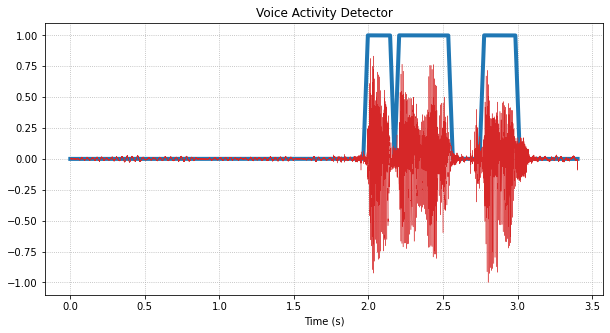

Επαναλάβετε την παραπάνω άσκηση με χρήση της δικής σας φωνής! Ηχογραφήστε τον εαυτό σας, για 5-10 δευτερόλεπτα, κρατώντας τα δυο πρώτα δευτερόλεπτα σιωπηλά. Χρησιμοποιήστε συχνότητα δειγματοληψίας $16000$ Hz, και μονοκαναλική ηχογράφηση. Προτεινόμενα προγράμματα ηχογράφησης: <br><br>

<center> Audacity, Wavesurfer (δωρεάν και τα δυο).</center>

**Επαναλάβατε τον παραπάνω κώδικα στο παρακάτω κελί με χρήση του δικού σας .WAV file!** Φροντίστε να συμπεριλάβετε στην παράδοσή σας το αρχείο αυτό!

In [ ]:
# INSERT CODE HERE






# END OF CODE

### ΠΡΟΣΟΧΗ: Το παραδοτέο αρχείο σας πρέπει να έχει όλα τα κελιά εκτελεσμένα! 

### Τρέξτε κάθε κελί του αρχείου, σώστε το, και καταθέστε το με τον τρόπο που περιγράφεται στην ιστοσελίδα.